# Simple Linear Regression

The goal of this project was to build a linear regression model from scratch.

In [1]:
%matplotlib inline

#imports
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('data.csv')
data.shape

53.426804033275026

#### Import the data
Here, we're using a dataset with two columns containing the amount of hours studied and the test scores students achieved, respectively.

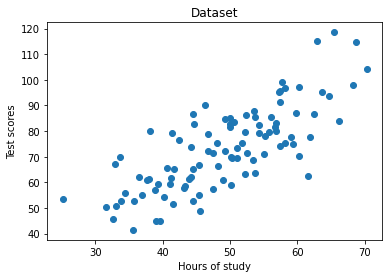

In [3]:
x = data.iloc[:,0].values
y = data.iloc[:,1].values

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

#### Defining the hyperparamters

In [4]:
#hyperparamters
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 10

#### Define cost function

In [13]:
def compute_cost(b, m, data):
    total_cost = 0
    N = float(len(data))
    
    #Compute sum of squared errors
    for i in range(0, len(data)):
        x = data.iloc[i, 0]
        y = data.iloc[i, 1]
        total_cost += (y - (m * x + b)) ** 2
        
    #Return average of squared error
    return total_cost/N

#### Define Gradient Descent functions

In [14]:
def gradient_descent(data, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []

    #For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, data))
        b, m = step_gradient(b, m, array(data), learning_rate)

    return [b, m, cost_graph]

def step_gradient(b_current, m_current, data, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(data))

    #Calculate Gradient
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    #Update current m and b
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    #Return updated parameters
    return b_updated, m_updated

#### Run gradient_descent() to get optimized parameters b and m

In [15]:
b, m, cost_graph = gradient_descent(data, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, data))

Optimized b: 0.029739275025959973
Optimized m: 1.4796456270100444
Minimized cost: 111.06788811472991


#### Plotting the cost per iterations

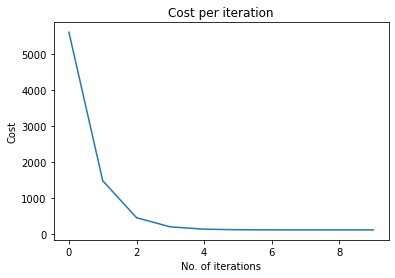

In [16]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

Gradient descent converges to local minimum after 5 iterations

#### Plot line of best fit

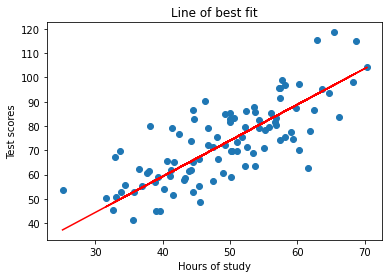

In [17]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = m * x + b
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()